# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

In [1]:
# TU CÓDIGO AQUÍ - PARTE 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

### 1. Carga y vista general

In [2]:
# 1. Cargar datos
df = pd.read_csv('data/pokemon.csv')
print(f"El dataframe es de {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"El dataframe tiene {df['Name'].duplicated().sum()} Pokémon repetidos.") # Comprobamos que no haya ningún pokémon repetido
df.head()

El dataframe es de 1024 filas y 43 columnas
El dataframe tiene 0 Pokémon repetidos.


,No.,Name,name_url,HP,Att,Def,S.Att,S.Def,Spd,PrimaryType,...,against_Steel,against_Fairy,Height (m),Weight (kg),Capture Rate,Base Happiness,Base Egg Steps,Experience Growth,mega_evolution,overall_legendary
0,1,Bulbasaur,bulbasaur,45,49,49,65,65,45,grass,...,1.0,0.5,0.7,6.9,45,50,2560,Medium Slow,0,0
1,2,Ivysaur,ivysaur,60,62,63,80,80,60,grass,...,1.0,0.5,1.0,13.0,45,50,2560,Medium Slow,0,0
2,3,Venusaur,venusaur,80,82,83,100,100,80,grass,...,1.0,0.5,2.0,100.0,45,50,2560,Medium Slow,1,0
3,4,Charmander,charmander,39,52,43,60,50,65,fire,...,0.5,0.5,0.6,8.5,45,50,2560,Medium Slow,0,0
4,5,Charmeleon,charmeleon,58,64,58,80,65,80,fire,...,0.5,0.5,1.1,19.0,45,50,2560,Medium Slow,0,0


Vemos que hay muchas columnas, pero en realidad no las usaremos todas. Este dataset contiene información relevante para el ámbito competitivo del juego, pero este proyecto se quiere centrar en los Pokémon como especies.

Por ende, se descartarán la mayoría de columnas orientadas al combate pokémon. Estas serán las que empiezan por *against_* (que hacen referencia a eficacias de movimientos en combate), las relacionadas con habilidades (*Ability1, Ability2 y HiddenAbility*) y la que determina si un pokémon puede megaevolucionar (*mega_evolution*).
Por último, se eliminarán las columnas *No.* y *name_url* porque con la columna *Name* es suficiente para identificar a un pokémon en caso de que sea necesario.

Todas las demás columnas se consideran necesarias para definir una especie de pokémon, y a lo largo de la práctica se observarán qué características son más relevantes para catalogarlos.

En la siguiente celda se eliminan las columnas y se muestran los tipos de valores (y si hay nulos) del dataframe.

### 2. Comparación entre variables numéricas

In [3]:
cols_a_eliminar = [col for col in df.columns if col.startswith("against_")]
cols_a_eliminar.extend(["No.","name_url","Ability1","Ability2","HiddenAbility","mega_evolution"])
df_simp = df.drop(columns=cols_a_eliminar) # Eliminamos las columnas mencionadas anteriormente. Estos cambios se guardan en un dataframe simplificado "df_simp"
df_simp.info() # Esto nos sirve para mostrar los tipos en las columnas y a la vez el número de valores nulos que hay en los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1024 non-null   object 
 1   HP                 1024 non-null   int64  
 2   Att                1024 non-null   int64  
 3   Def                1024 non-null   int64  
 4   S.Att              1024 non-null   int64  
 5   S.Def              1024 non-null   int64  
 6   Spd                1024 non-null   int64  
 7   PrimaryType        1024 non-null   object 
 8   SecondaryType      525 non-null    object 
 9   Generation         1024 non-null   int64  
 10  Male%              869 non-null    float64
 11  Female%            869 non-null    float64
 12  Height (m)         1024 non-null   float64
 13  Weight (kg)        1024 non-null   float64
 14  Capture Rate       1024 non-null   int64  
 15  Base Happiness     1024 non-null   int64  
 16  Base Egg Steps     1024 

Podemos ver que la mayoría de columnas son numéricas. De ellas hay algunas que se podrían considerar categóricas, pero ya se observará en el futuro. Cabe destacar que *overall_legendary* es en realidad una variable booleana, ya que indica si el pokémon en cuestión es legendario o mítico (1) o no (0)
También observamos que algunas columnas contienen valores nulos, pero estos tienen un significado:

- **SecondaryType**: Hay algunas especies de pokémon que solo tienen un tipo. Que no tenga un tipo secundario no significa que el dato no sirva.
- **Male%** y **Female%**: Los pokémon pueden tener sexo o no. La mayoría de pokémon sin sexo son legendarios, y hay algunos de estos con sexo. 

### 3. Estadísticos Descriptivos

In [4]:
summary = df_simp.describe()
summary.loc["median"] = df_simp.median(numeric_only=True)
summary


,HP,Att,Def,S.Att,S.Def,Spd,Generation,Male%,Female%,Height (m),Weight (kg),Capture Rate,Base Happiness,Base Egg Steps,overall_legendary
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,869.000000,869.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,70.166992,77.511719,72.421875,70.063477,70.188477,67.166016,4.737305,54.884327,45.115673,1.229688,68.142383,94.727539,47.143555,3811.250000,0.101562
std,26.638238,29.795291,29.173190,29.667576,26.646534,28.723881,2.631551,20.135781,20.135781,1.295634,122.705266,76.198697,18.358063,3434.573228,0.302220
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.000000,0.100000,0.100000,3.000000,0.000000,640.000000,0.000000
25%,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,3.000000,50.000000,49.800000,0.500000,8.575000,45.000000,50.000000,2560.000000,0.000000
50%,68.000000,75.000000,70.000000,65.000000,66.500000,65.000000,5.000000,50.000000,50.000000,1.000000,28.200000,60.000000,50.000000,2560.000000,0.000000
75%,85.000000,100.000000,90.000000,90.000000,85.250000,88.250000,7.000000,50.200000,50.000000,1.500000,70.500000,140.000000,50.000000,3200.000000,0.000000
max,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,9.000000,100.000000,100.000000,20.000000,999.900000,255.000000,140.000000,15360.000000,1.000000
median,68.000000,75.000000,70.000000,65.000000,66.500000,65.000000,5.000000,50.000000,50.000000,1.000000,28.200000,60.000000,50.000000,2560.000000,0.000000


Si observamos los distintos estadísticos descriptivos, podemos afirmar que en la mayoría de columnas numéricas no hay mucho sesgo, puesto que la media y la mediana son valores parecidos. Las excepciones son *Weight (kg)*, *Capture Rate* y *Base Egg Steps*. Estas serán las candidatas a tener outliers en la base de datos. De *Base Egg Steps* podemos añadir que tiene un rango notablemente distinto a las demás variables.

**Nota** Se han ignorado las columnas *Generation* y *overall_legendary* porque describen grupos de pokémon, así que en realidad son variables categóricas.

### 4. Detección de Outliers

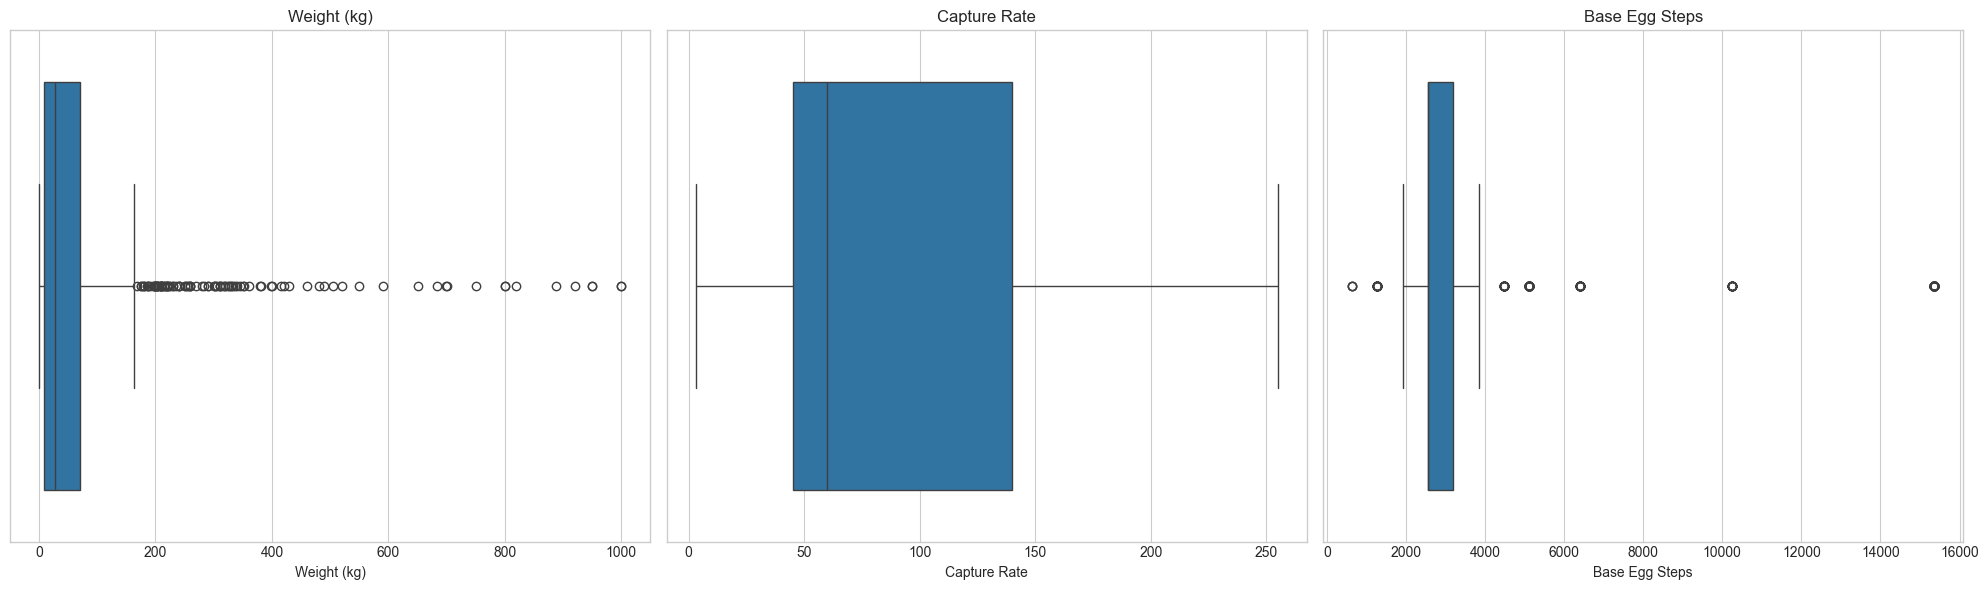

In [5]:
cols = ["Weight (kg)", "Capture Rate", "Base Egg Steps"]
fig, axes = plt.subplots(1, len(cols), figsize=(20, 6)) 

for i, el in enumerate(cols):
    sns.boxplot(x=df[el], ax=axes[i])
    axes[i].set_title(el)

plt.tight_layout()
plt.show()

In [6]:
# De las tres columnas de las que hemos hecho boxplot, observamos que "Weight (kg)" está sesgada a la derecha.
# Usaremos valores más concretos para contemplar de qué magnitud es el sesgo.
sk = df_simp["Weight (kg)"].skew()
ku = df_simp["Weight (kg)"].kurtosis()
print(f"Asimetría del peso: {sk}")
print(f"Curtosis del peso: {ku}")

# Adicionalmente, si nos fijamos en el apartado 3, podemos ver una gran diferencia entre el valor del tercer cuantil y el máximo de la columna "Height (m)". 
# Aplicaremos el IQR para ver los outliers de esta columna
Q1 = df_simp["Height (m)"].quantile(0.25)
Q3 = df_simp["Height (m)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_simp[(df_simp["Height (m)"] < lower_bound) | (df_simp["Height (m)"] > upper_bound)]
print(f"\nLa columna de altura tiene {len(outliers)} outliers ({(len(outliers)/len(df_simp)*100)}% de las columnas)")

Asimetría del peso: 4.2442940788656465
Curtosis del peso: 22.579553956982263

La columna de altura tiene 42 outliers (4.1015625% de las columnas)


- En el caso de *Weight (kg)* vemos en el boxplot que la distribución es asimétrica, y esta asimetría queda numéricamente y visualmente demostrada que hay mucho sesgo a la derecha.
La curtosis indica que la distribución es Leptocúrtica, que conlleva un pico alto, colas pesadas y más outliers que los otros tipos de distribución definidos por la curtosis.

- La columna *Capture Rate* no parece ser problemática en el sentido de tener muchos outliers (almenos si se comparan con los otros dos boxplots)

- El caso de *Base Egg Steps* se observan outliers tanto a la izquierda como a la derecha. Lo que es relevante es que los círculos que indican los outliers son más gruesos que los indicados en el boxplot *Weight (kg)*, lo cual indica que hay más de un outlier en un valor concreto. Se considera que esta columna vale la pena que sea representada como histograma.

- Por último, en *Height (m)* se ha detectado que aproximadamente el 4% de los datos son outliers segun el IQR.

Si bien hay outliers en algunas de las columnas mencionadas, en el caso de la **altura** y el **peso** es imperativo **dejar los datos como están**, puesto que representan una realidad sobre la especie de pokémon (por lo tanto, estos outliers no afectarán negativamente a los modelos de predicción). En la columna de *Base Egg* observaremos su historial a continuación.

### 5. Visualización de Distribuciones

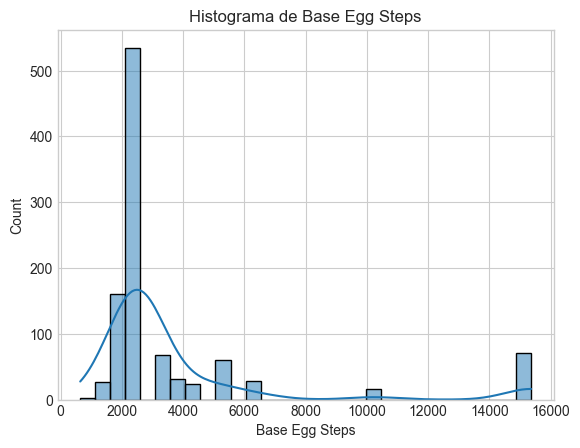

In [7]:
# Tal i como se ha mencionado anteriormente, se mostrará el histograma de "Base Egg Steps"
sns.histplot(df["Base Egg Steps"], bins=30, kde=True)
plt.title("Histograma de Base Egg Steps")
plt.show()

Se puede observar más o menyos lo que se sospechava en el apartado anterior. Los "outliers" en realidad son grupos con un valor asociado. Esto también se puede comprobar manualmente en los datos. En resumen, ***Base Egg Steps* es una variable categórica**.

### Conclusiones
En conclusión, la calidad de los datos es excelente. Los nulos aportan significado, los outliers y el sesgo (cuando los hay) representan la realidad de los datos.
Esto no quiere decir que los datos estén listos para modelar. Habría que realizar transformaciones para cambiar los valores nulos del dataframe.

## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

In [8]:
# TU CÓDIGO AQUÍ - PARTE 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

### 0. Transformación de valores nulos

In [9]:
# Se vuelve a cargar el dataset por si se quiere ejecutar solo el código de esta segunda parte
df = pd.read_csv('data/pokemon.csv')
cols_a_eliminar = [col for col in df.columns if col.startswith("against_")]
cols_a_eliminar.extend(["No.","name_url","Ability1","Ability2","HiddenAbility","mega_evolution"])
df_simp = df.drop(columns=cols_a_eliminar)

# Se transforman los valores nulos
df_simp["SecondaryType"] = df_simp["SecondaryType"].fillna("None")
df_simp["Male%"] = df_simp["Male%"].fillna(0)
df_simp["Female%"] = df_simp["Female%"].fillna(0)

### 1. Análisis de correlación

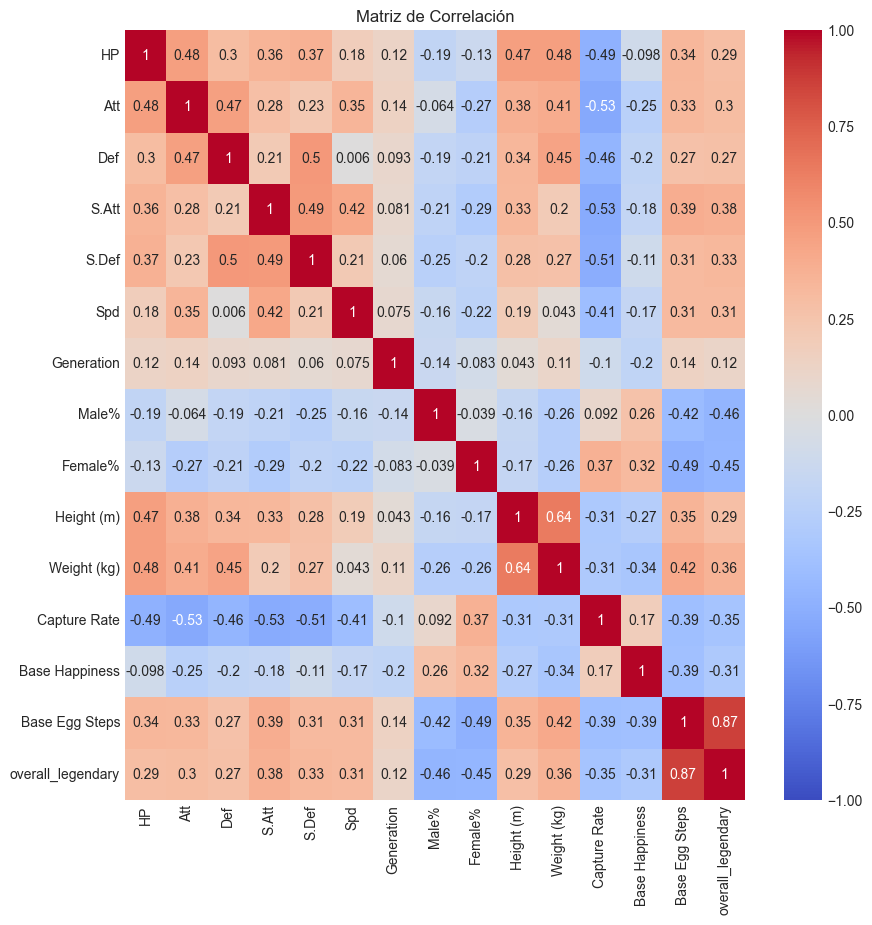

In [10]:
# Correlación
df_corr = df_simp[list(df_simp.columns)].corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, 
            annot=True,
            cmap='coolwarm',  
            vmin=-1, vmax=1,  
            center=0)
plt.title('Matriz de Correlación')
plt.show()

En general, solo hay una correlación fuerte (*Base Egg Steps* y *overall_legendary*). Para la variable que se quiere predecir (*Weight (kg)*), podemos observar que hay una fuerte correlación con *Height (m)*. Este hecho es lógico, puesto que aunque no sean reales los pokémon adaptan en cierta medida a la biología real. Más allá de la altura, hay una moderada correlación con las estadísticas de *HP*, *Att*, *Def*, *S.Att* y *Base Egg Steps*. Esta última columna en realidad es categórica, pero nos podemos aprovechar de ella porque está representado con números sin la necesidad de realizar un encoding.

### 2. Relaciones Bivariantes

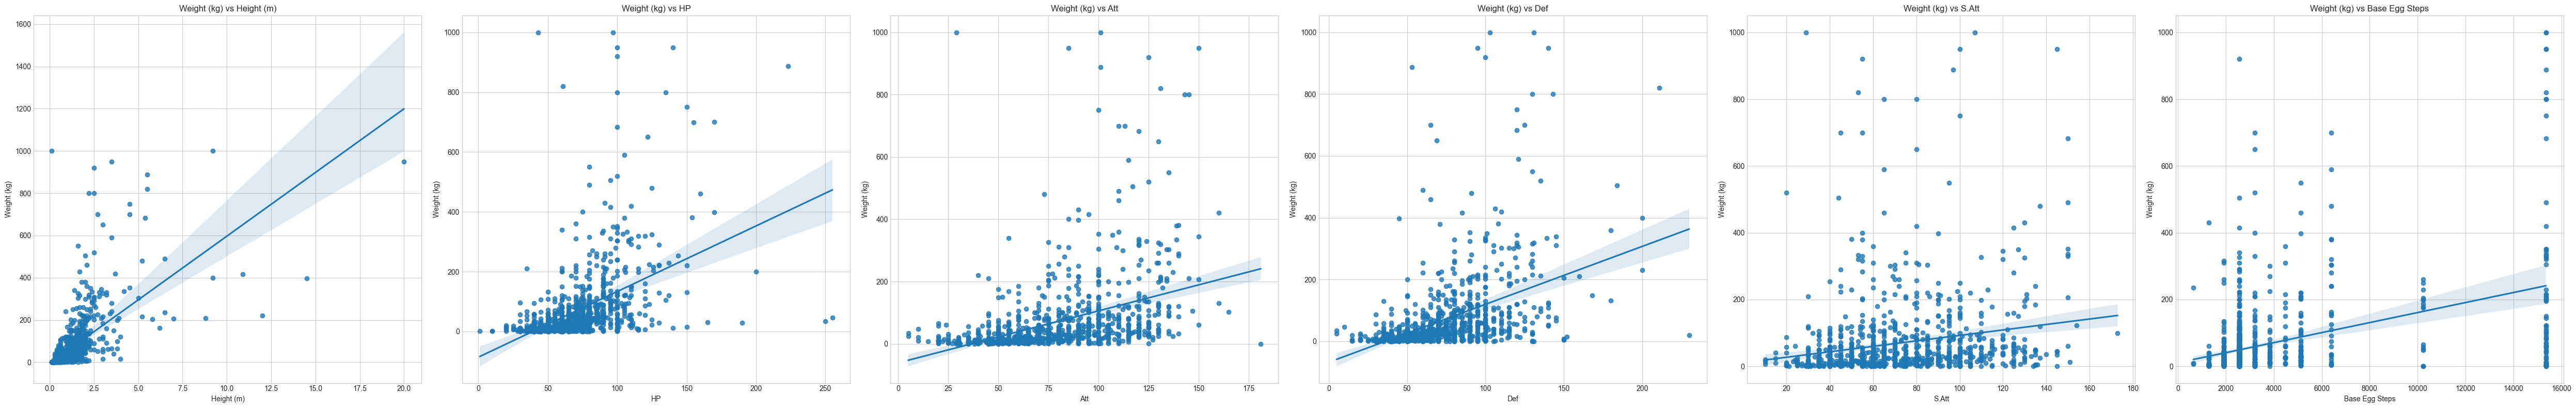

In [11]:
cols = ["Height (m)", "HP", "Att", "Def", "S.Att", "Base Egg Steps"]
fig, axes = plt.subplots(1, len(cols), figsize=(50, 8)) 

for i, el in enumerate(cols):
    sns.regplot(x=el, y="Weight (kg)", data=df_simp, ax=axes[i])
    axes[i].set_title(f"Weight (kg) vs {el}")

plt.tight_layout()
plt.show()

Para laprimera relación bivariantes observamos que la mayoría de puntos se concentran en los valores bajos, y a medida que las variables aumentan uno de ellas es bastante inferior o superior respecto la otra. Las cuatro siguientes siguen esta tendencia, pero se aprecia distinto debido a la escala del eje X. En la última vemos lo que decía sobre la columna *Base Egg Steps*: aquí las categorías se aprecian con claridad. En general lo que nos indican estas nubes de puntos es que un modelo podría representar más bien estos datos de no ser de los outliers, pero como se ha dicho anteriormente no se eliminarán.

### 3. Regresión Lineal (Scikit-Learn)

RMSE del modelo: 118.09
R2 del modelo: 0.44


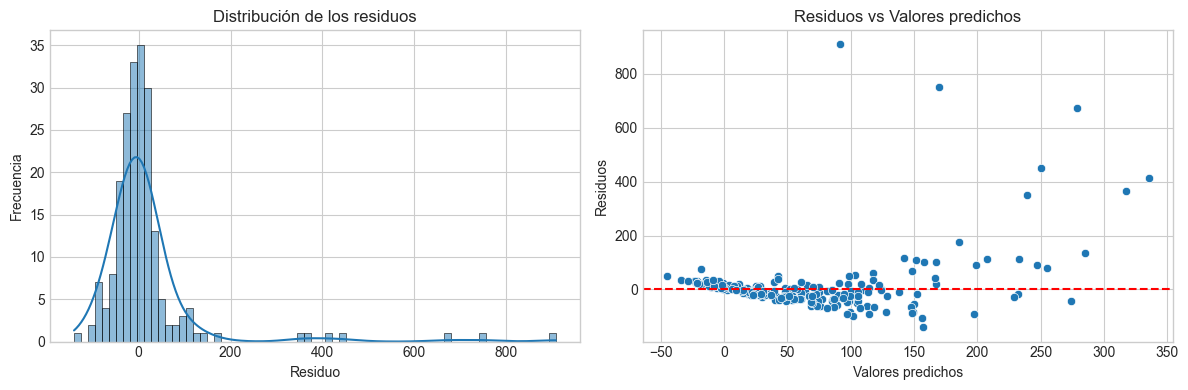

In [12]:
# Selección de variables
X = df_simp[["Height (m)", "HP", "Att", "Def", "S.Att", "Base Egg Steps"]]
y = df_simp["Weight (kg)"]

# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción del modelo
y_pred = modelo.predict(X_test)

# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE del modelo: {rmse:.2f}")
print(f"R2 del modelo: {r2:.2f}")

# Diagnóstico del modelo
residuos = y_test - y_pred
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribución de residuos
sns.histplot(residuos, kde=True, ax=axes[0])
axes[0].set_title('Distribución de los residuos')
axes[0].set_xlabel('Residuo')
axes[0].set_ylabel('Frecuencia')

# Residuos vs predichos
sns.scatterplot(x=y_pred, y=residuos, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuos vs Valores predichos')
axes[1].set_xlabel('Valores predichos')
axes[1].set_ylabel('Residuos')

plt.tight_layout()  
plt.show()

Este modelo es capaz de representar aproximadamente el 44% de los datos. Este porcentaje se atribuye a la presencia de outliers. De hecho, la distribución de residuos (imagen de la izquierda) posee características similares a la distribución de pesos mostrada en un boxplot de la primera parte. Por lo que respecta a los residuos vs los valores predichos, la tendencia es similar en el sentido de que donde más se equivoca el modelo es con los valores grandes.

### 4. Regresión logistica

In [13]:
# Selección de variables
X = df_simp[["Height (m)", "HP", "Att", "Def"]]
y = df_simp["Weight (kg)"]

# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenamiento del modelo
modelo = LogisticRegression()
try:
    modelo.fit(X_train, y_train)

    # Predicción y evaluación del modelo
    y_pred = modelo.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE del modelo: {rmse:.2f}")
    print(f"R2 del modelo: {r2:.2f}")
except ValueError:
    print("ERROR: valor no permitido")

ERROR: valor no permitido


Para la variable objetivo pensada, un modelo de regresión logística no tiene ningún sentido. Este modelo tiene un uso para variables de dos categorías. Si bien se podría transformar la columna del peso para que sea booleana (por ejemplo, *Peso > 23 kg*), esto no aportaría información relevante para definir el peso de un pokémon: solo los separaría en dos grupos. Si comparamos los modelos en el caso de este ejercicio con estos datos y con este objetivo, la regresión lineal es mucho más adecuada porque otorga un número decimal, no una decisión de True/False.

### Conclusiones
Se ha entrenado un modelo capaz de representar una parte de los datos. El modelo en sí no es preciso, pero no tiene por qué serlo puesto de que se tratan de especies de pokémon. Como en la vida real, emulan casos de especies excepcionales que no tienen por qué encajar con ningún estándar. El objetivo de esta práctica con estos datos era observar si había un patrón en el diseño de los pokémon, y la respuesta es que no. Aún así, se puede ver algún patrón mediante la matriz de correlación sobretodo con las estadísticas, pero ninguno ha resultado significativo para determinar el peso de un pokémon. Esta práctica es un ejemplo de que un resultado "malo" no es necesariamente malo.

## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


Regresión lineal de 16 iteraciones completada con un R^2 de 0.6571789368211864
Intercepto estimado: 3.100816254313858
Pendiente estimada: 3.5635332077680912


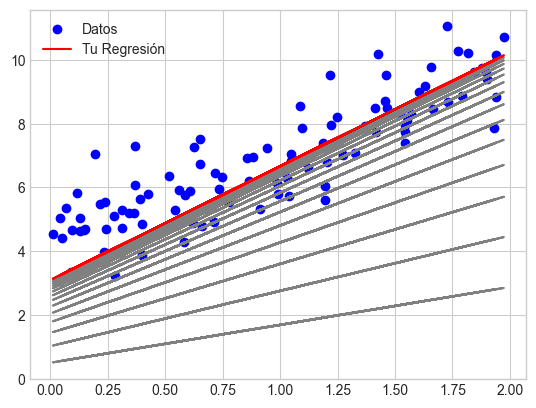

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression( X, y, iteraciones=16, eta=0.1, recta_intermedia = True):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    # TU CÓDIGO AQUÍ
    m = len(X) # Para no ir calculando el valor en cada iteración, lo almacenamos en una variable puesto que len(X) no cambiará durante el bucle
    #Generacion aleatoria de parametros (numpy)
    # Es buena práctica establecer una semilla para que los resultados no cambien entre ejecuciones.
    #Se establece dentro de la función por si se quisiera copiar el código 
    np.random.seed(42)
    w = np.random.randn()
    b = np.random.randn()

    for i in range(1, iteraciones):
        # y = b + w * X - error
        # En cambio, para el valor predecido será y_pred = b + w * X
        y_pred = b + w * X
        # Si sustituimos, tenemos que y = y_pred - error. Por lo tanto:
        # calcular el error
        error = y_pred - y

        #Ajustar parametros (Gradientes del MSE) 
        dw = (1/m) * np.sum(error * X)
        db = (1/m) * np.sum(error)
        
        # Actualizamos los valores de la regresión
        w = w - eta * dw
        b = b - eta * db

        #pintar recta
        if recta_intermedia:
            pintar_recta(b, w, X, y)

    # Cálculo de R^2
    r_squared = 1 -(np.sum((y - y_pred) ** 2))/(np.sum((y - np.mean(y)) ** 2)) 
    
    return b, w, r_squared


def pintar_recta(b, w, X, y):
    plt.plot(X, b + w * X, color='gray')


# Probemos tu función
iteraciones = 16
b, w, r_squared = evolve_linear_regression(X_mock, y_mock, iteraciones)
print(f"Regresión lineal de {iteraciones} iteraciones completada con un R^2 de {r_squared}")
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.show()

En la imágen podemos apreciar cómo el modelo se aproxima a los datos con un R² de 0.65 con 16 iteraciones. Si se aumentaran el número de iteraciones del proceso, el modelo se ajustaría más a los datos: 

Regresión lineal de 10 iteraciones completada con un R^2 de 0.3482769262514659
Regresión lineal de 15 iteraciones completada con un R^2 de 0.6426957873388038
Regresión lineal de 20 iteraciones completada con un R^2 de 0.6851902053197274
Regresión lineal de 30 iteraciones completada con un R^2 de 0.7116694103403572
Regresión lineal de 50 iteraciones completada con un R^2 de 0.7402412317642022
Regresión lineal de 60 iteraciones completada con un R^2 de 0.7486574444106513
Regresión lineal de 70 iteraciones completada con un R^2 de 0.7546338692320652
Regresión lineal de 80 iteraciones completada con un R^2 de 0.7588777811529674
Regresión lineal de 90 iteraciones completada con un R^2 de 0.7618914204123528
Regresión lineal de 100 iteraciones completada con un R^2 de 0.7640314322117343


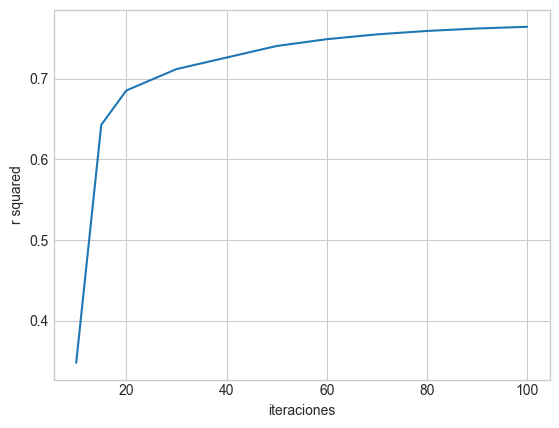

In [15]:
iteraciones = [10,15,20,30,50,60,70,80,90,100]
lista_r_squared = []
for i in iteraciones:
    b, w, r_squared = evolve_linear_regression(X_mock, y_mock, iteraciones=i, recta_intermedia=False)
    print(f"Regresión lineal de {i} iteraciones completada con un R^2 de {r_squared}")
    lista_r_squared.append(r_squared)

plt.plot(iteraciones, lista_r_squared)
plt.xlabel("iteraciones")
plt.ylabel("r squared")
plt.show()

Como se puede apreciar en la gráfica anterior, el modelo es más preciso a medida de que se permiten más iteraciones en la evolución de la recta. Pasamos ahora a comparar el modelo manual con el que provee Scikit-Learn.

Intercepto estimado con sklearn: 4.215096157546747
Pendiente estimada con sklearn: 2.7701133864384837
R^2 del modelo de sklearn: 0.7692735413614223
Intercepto estimado: 3.8104345195638047
Pendiente estimada: 3.1274069010119976
R^2 de tu regresión: 0.7546338692320652


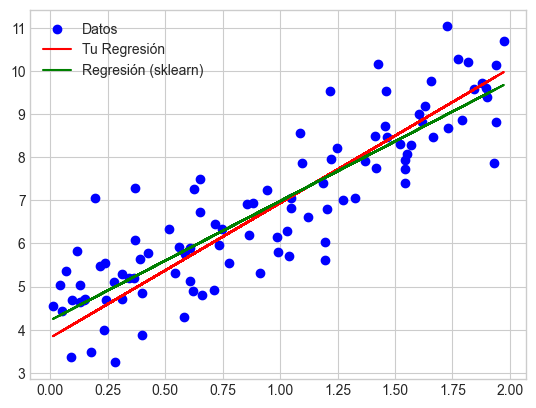

In [16]:
from sklearn.linear_model import LinearRegression

# Con funciones de sklearn
X_reshaped = X_mock.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, y_mock)
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]
print(f"Intercepto estimado con sklearn: {b_sklearn[0]}")
print(f"Pendiente estimada con sklearn: {w_sklearn[0]}")

y_pred_sklearn = model.predict(X_reshaped)
r2 = 1 -(np.sum((y_mock - y_pred_sklearn) ** 2))/(np.sum((y_mock - np.mean(y_mock)) ** 2)) 
print(f"R^2 del modelo de sklearn: {r2}")

# Modelo entrenado manualmente
# Con la demostración anterior, nos quedamos con iteraciones = 70 puesto que representa bastante bien los datos.
# Además, más allá de ese número el valor de R^2 no mejora tanto como para justificar más iteraciones
iteraciones = 70
b, w, r_squared = evolve_linear_regression(X_mock, y_mock, iteraciones, recta_intermedia=False)
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")
print(f"R^2 de tu regresión: {r_squared}")
# Comparación entre los dos modelos
plt.figure()
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.plot(X_mock, y_pred_sklearn, color='green', label='Regresión (sklearn)')
plt.legend()
plt.show()

En la imagen podemos observar que ambos modelos representan bastante bien los datos. Si nos fijamos en los valores de R² podemos determinar que el modelo usando las funciones de Scikit-Learn representa con mayor exactitud los datos que el modelo entrenado manualmente. Esta diferencia se justifica por cómo se resuelve el algoritmo en los distintos casos. En el caso manual terminamos el algoritmo pasadas unas iteraciones, mientras que el algoritmo implementado en Scikit-Learn se detiene cuando el error es menor a una tolerancia `tol` (véase la documentación de [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

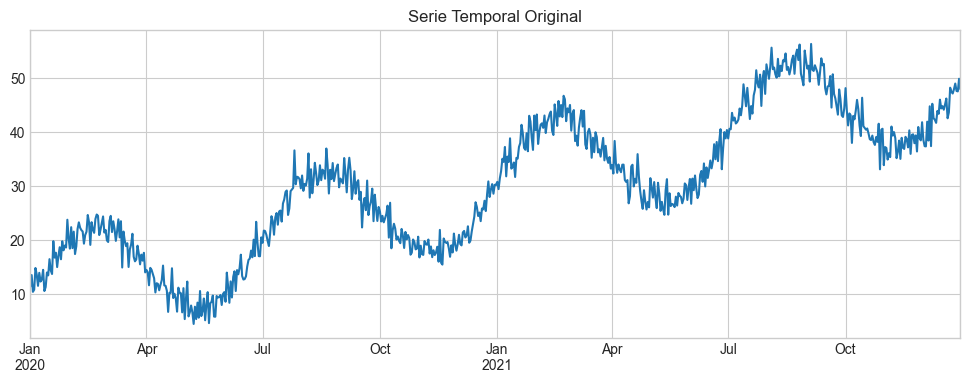

In [17]:
# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# TU CÓDIGO AQUÍ

# 1. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.show()

Las ventas de la serie temporal se parece a un movimiento harmónico simple que ligeramente va augmentando en el eje Y a medida que el tiempo pasa. En otras palabras, cada vez hay más ventas, junto con sus subidas y bajadas.

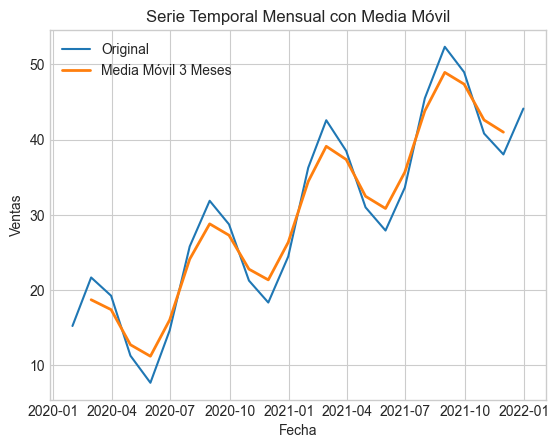

In [ ]:
# 2. Resampleo Mensual
monthly_sales = ts_df.resample('ME').mean() # Usamos "ME" en lugar de "M" porque está obsoleto

# 3. Media Móvil
monthly_sales['Moving_Avg'] = monthly_sales['Sales'].rolling(window=3, center = True).mean()

# Comparación de los cambios
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Original')
plt.plot(monthly_sales.index, monthly_sales['Moving_Avg'], label='Media Móvil 3 Meses', linewidth=2)

plt.title("Serie Temporal Mensual con Media Móvil")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.show()

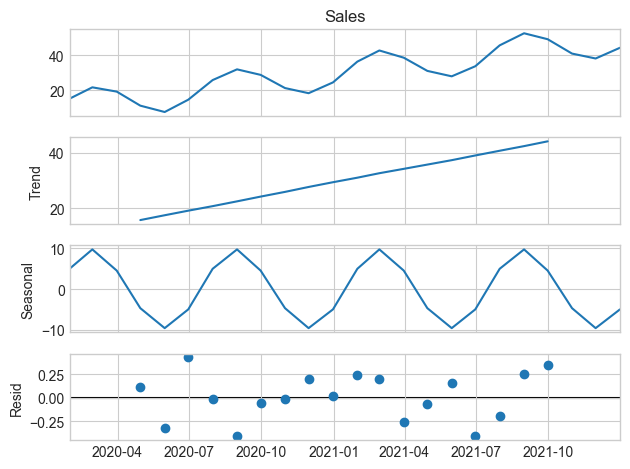

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 4. Descomposición
result = seasonal_decompose(monthly_sales['Sales'], model='additive', period=6)
result.plot()
plt.show()